Analyzing Employee Trends to Reduce Attrition Problem: Our company is experiencing a concerning level of employee churn. We need to understand the underlying reasons for this attrition to develop effective retention strategies.

Solution: Data is our key! By analyzing employee trends, we can identify patterns and factors contributing to departures.

What to Explore:

Demographics: Are specific age groups, departments, or job roles more likely to leave?
Performance: Is there a correlation between performance ratings and attrition?
Engagement: Are disengaged employees more likely to exit? Analyze surveys, pulse checks, and exit interviews.
Compensation & Benefits: Are certain pay scales or benefit offerings associated with higher attrition?
Internal Mobility: Do employees seek opportunities within the company before leaving?
External Factors: Are industry trends or competitor offerings influencing our attrition rate?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)


In [2]:

data_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


data['Attrition'] = 1.0*(data['Attrition'] == 'Yes')

In [3]:
data_df.shape

(1470, 35)

In [4]:
data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#the minimum age is 18,so 'Over18' column can be dropped
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column

In [5]:
data_df.describe().round(0).transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
Education,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
EnvironmentSatisfaction,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1470.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0


In [6]:
data_df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
#most employees r sales executive, more male employees. RnD has the most employees, more employees r married

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#All columns has 1470 non-null entries, no missing values

In [10]:
#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours
data_df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)

In [11]:
#Use `select_dtypes` method to select columns of dtype 'object' - categorical features
data_df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [12]:
#one hot encoder to transform 8 categorical features above to numerical
#non numberical Columns 
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [13]:
#Deep copy the original data
data_df_encoded = data_df.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in cat_cols:
        data_df_encoded[col] = lab_enc.fit_transform(data_df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


data_df_encoded.head()

In [14]:
data_df_encoded.shape

(1470, 31)

<Axes: >

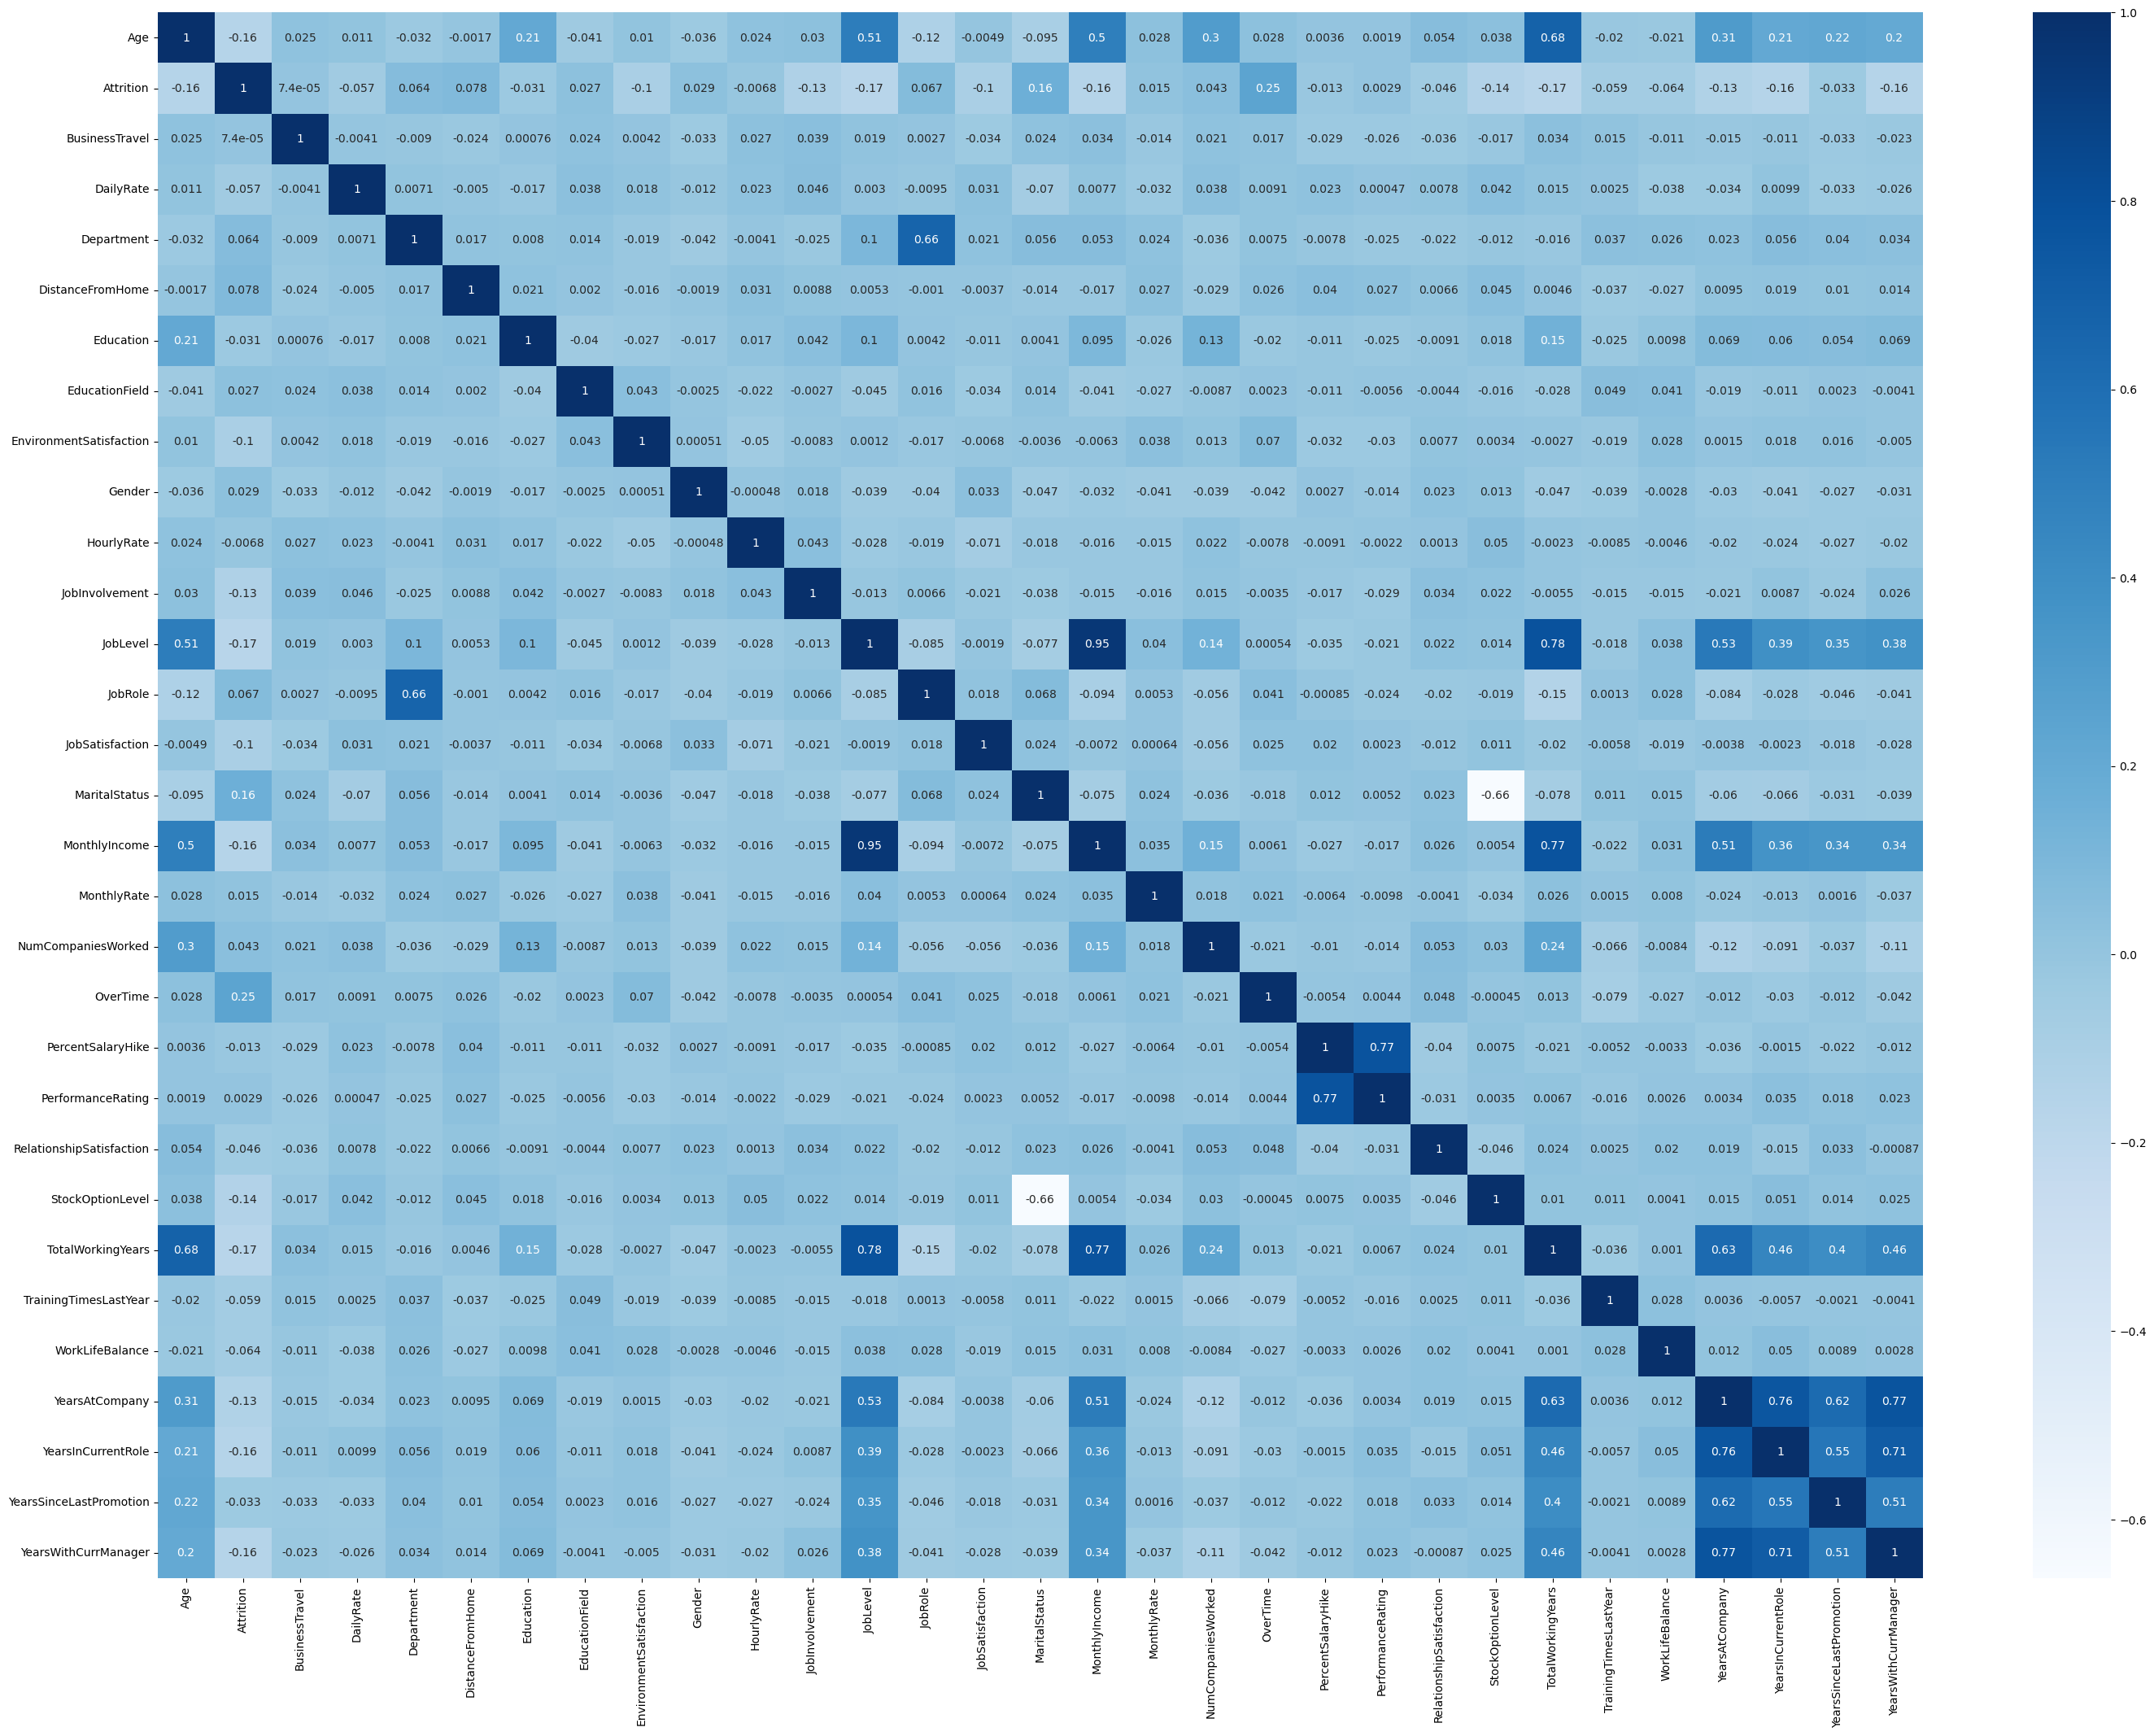

In [15]:
data_corr=data_df_encoded.corr()
plt.rcParams["figure.figsize"] = [35,25]
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,annot=True,cmap="Blues")

#Extracting categorical data only into panda df
cat_columns = data.select_dtypes(include='object')
cat_Frame = pd.DataFrame({'Object column Name': cat_columns.columns})
print(cat_Frame)

for col_data in cat_columns:
    print(data[col_data].value_counts(),'\n')

In [ ]:
#Work from high level to more specific
#I. Univariate chart of target variable : Attrition

In [ ]:
data_df_encoded['Attrition'].value_counts(normalize=True)

In [ ]:
data_df_encoded['Attrition'].value_counts(normalize=True).plot(kind='bar')

there is 16.12% attrition rate. 83.88% employee stayed.

In [ ]:
#II. Bivariate chart  to compare each feature to the target (scatter/box plot etc)

In [ ]:

#data_df['Attrition'] = data_df['Attrition'].astype(float)
data_df['Attrition'] = 1.0*(data_df['Attrition'] == 'Yes')

In [ ]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

data_df['Education_cat'] = data_df['Education'].replace(education_map)

In [ ]:
#data_df[['Education_cat','Attrition']].groupby(['Education_cat']).mean().sort_values(by='Attrition', ascending=False)
data_df[['Education_cat','Attrition']].groupby(['Education_cat']).mean()

In [ ]:

data_df[['Education_cat','Attrition']].groupby(['Education_cat']).mean().sort_values(by='Attrition', ascending=False).plot(kind='bar')

In [ ]:
#attrition rate breakdown by education level shows highest education (doctor) has the lowest attrion rate, below college has the highest attrition rate

In [ ]:
df_ec1=data_df[['Education_cat','Attrition']].groupby(['Education_cat']).mean().sort_values(by='Attrition', ascending=False)
df_ec1.plot(kind='bar')

In [ ]:
#lExploring what factors strongly affect attrition rate.
#we have our categorical columns we want to explore how important it is to the attrition rate: \
#JobInvolvement, Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance.

#Hypothesis: It is likely that the "Low" rating within each category will exhibit a higher attrition rate.
#This assumption is based on the notion that these attributes can directly impact an individual's decision to leave the company. 
#They are closely linked to satisfaction with the job involment , work-life balance. etc

In [ ]:
#EnvironmentSatisfaction affect on the Attrition rate

In [ ]:
ES_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data_df['ES_cat'] = data_df['EnvironmentSatisfaction'].replace(ES_mapping)

data_df['ES_cat'].value_counts()

In [ ]:

data_df[['ES_cat','Attrition']].groupby(['ES_cat']).mean().sort_values(by='Attrition', ascending=False).plot(kind='bar')
# Sorting by the 'No' count in ascending order
#data_ES = data_ES.sort_values(by='No', ascending=True)
#data_ES

In [ ]:
#environment satisfaction strongly related to attrition. when environment satisfaction is low, the employees likely to leave and vice versa

In [ ]:
#How JobInvolvement affect the attrition rate


In [ ]:
JI_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data_df['JI_cat'] = data_df['JobInvolvement'].replace(JI_mapping)

In [ ]:
data_df[['JI_cat','Attrition']].groupby(['JI_cat']).mean().sort_values(by='Attrition',ascending=False).plot(kind='bar')
                                     

In [ ]:
#when the job involment is high, the attrition is low and vice versa


#Exploring employee demographis such as distance from home and marital status , how these factors affect the attrition rate

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df_dfh=data_df[['DistanceFromHome','Attrition']].groupby(['DistanceFromHome']).mean().sort_values(by='Attrition',ascending=False)
sns.lineplot(data=df_dfh, x='DistanceFromHome', y='Attrition', marker='o', ax=axes[0])
axes[0].set_title(f'Attrition Rate by Distance From Home')
axes[0].set_xlabel('DistanceFromHome')
axes[0].set_ylabel('Attrition Rate (%)')

#attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
df_ms=data_df[['MaritalStatus','Attrition']].groupby(['MaritalStatus']).mean().sort_values(by='Attrition',ascending=False)
sns.barplot(data=df_ms, x='MaritalStatus', y='Attrition', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Marital Status')
axes[1].set_xlabel('MaritalStatus')
axes[1].set_ylabel('Attrition Rate (%)')


In [ ]:
#interested finding people who live closeby has higher attrition rate than those who lives between 25-30 miles
#single people have higher attrition rate

# define array for numeric and categorical vars

num_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data_df.select_dtypes(include=['object', 'category']).columns

num_cols, cat_cols

df_num=data.select_dtypes(include=np.number)
df_num.head(5)

df_num.info()

In [ ]:
#Business Travel mapping
BT_mapping = {
    "Non-Travel":0,
    "Travel_Rarely": 1,
    "Travel_Frequently": 2
}

data_df['BT_cat'] = data_df['BusinessTravel'].replace(BT_mapping)
data_df['BusinessTravel']=data_df['BusinessTravel'].replace(BT_mapping)
data_df['BusinessTravel']=data_df['BusinessTravel'].astype('int64')
#data['ES_cat'].value_counts()

In [ ]:
#job role mapping
JR_mapping  = {
    "Human Resources": 8, 
    "Manager": 7,
    "Healthcare Representative": 6,
    "Manufacturing Director": 5, 
    "Laboratory Technician" : 4,
    "Sales Representative": 3, 
    "Sales Executive": 2,
    "Research Director":1, 
    "Research Scientist": 0
}
data_df['JobRole']=data_df['JobRole'].replace(JR_mapping)
data_df['JobRole']=data_df['JobRole'].astype('int64')

In [ ]:
#department mapping
Dept_mapping = {
    "Research & Development" : 0, 
    "Sales" : 1, 
    "Human Resources" : 2
}
data_df["Department"] = data_df["Department"].replace(Dept_mapping)
data_df["Department"] = data_df["Department"].astype("int64")

In [ ]:
#education field mapping
EF_mapping = {
    "Life Sciences": 0, 
    "Medical": 1, 
    "Marketing" : 2,
    "Technical Degree" : 3, 
    "Human Resources" : 4, 
    "Other" : 5  }
data_df["EducationField"] = data_df["EducationField"].replace(EF_mapping)
data_df["EducationField"] = data_df["EducationField"].astype("int64")

In [ ]:
#Gender mapping
G_mapping = {"Male": 1, "Female": 0}
data_df["Gender"] = data_df["Gender"].replace(G_mapping)
data_df["Gender"] = data_df["Gender"].astype("int64")

In [ ]:
#marital status mapping
MT_mapping = {"Divorced": 2,"Married": 1, "Single": 0}
data["MaritalStatus"] = data["MaritalStatus"].replace(MT_mapping)
data["MaritalStatus"] = data["MaritalStatus"].astype("int64")

In [ ]:
data['OverTime'] = 1.0*(data['OverTime'] == 'Yes')

In [ ]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [x for x in data.columns if x not in ['Attrition', 'OverTime']]
#features = [x for x in data.columns ]

scatterplots(features, ncol=4, figsize=(15, 15))

In [ ]:
#II bivariate chart to explore relationship between categorical features and target var: Attrition (not captured in correlation matrix

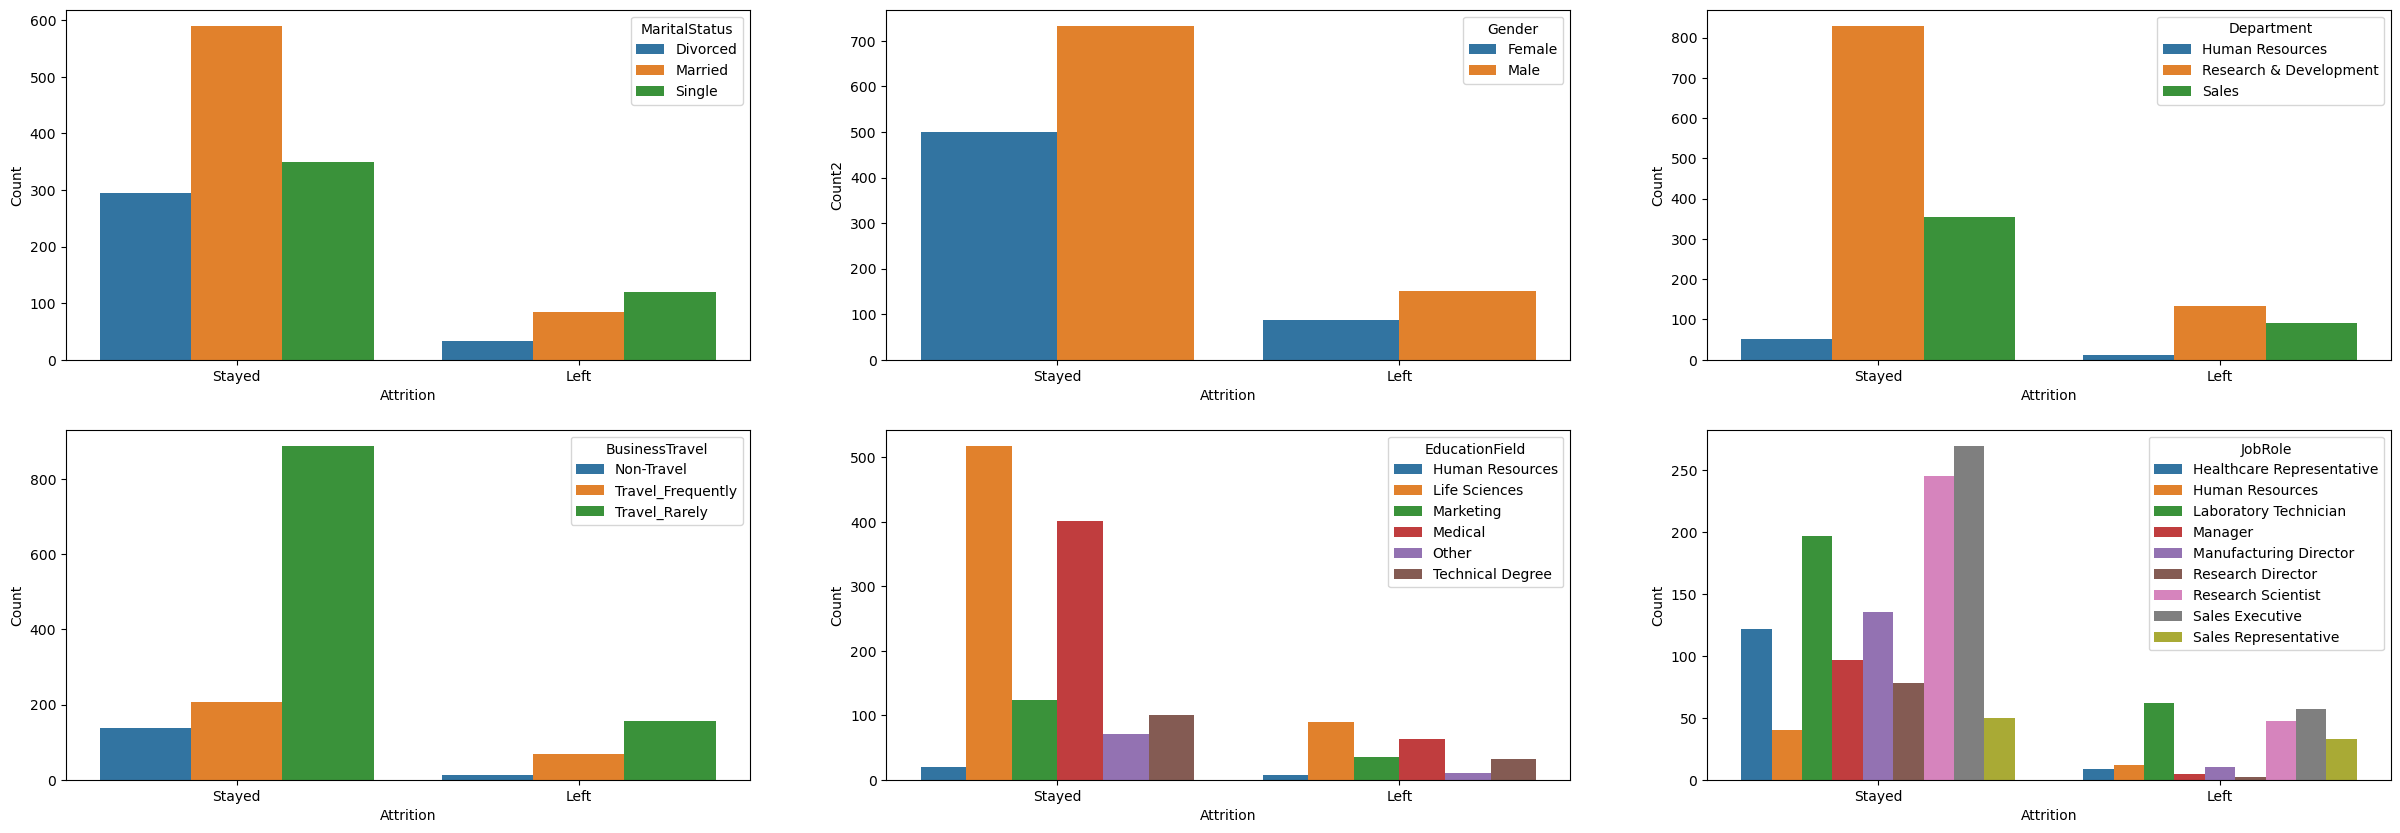

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

counts = data_df.groupby(['Attrition', 'MaritalStatus']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='MaritalStatus', data=counts, ax=axs[0,0])
axs[0,0].set_xticks([0,1])
axs[0,0].set_xticklabels(['Stayed', 'Left'])

counts = data_df.groupby(['Attrition', 'Gender']).size().reset_index(name='Count2')
sns.barplot(x='Attrition', y='Count2', hue='Gender', data=counts, ax=axs[0,1])
axs[0,1].set_xticks([0,1])
axs[0,1].set_xticklabels(['Stayed', 'Left'])

counts = data_df.groupby(['Attrition', 'Department']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='Department', data=counts, ax=axs[0,2])
axs[0,2].set_xticks([0,1])
axs[0,2].set_xticklabels(['Stayed', 'Left'])

counts = data_df.groupby(['Attrition', 'BusinessTravel']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='BusinessTravel', data=counts,ax=axs[1,0])
axs[1,0].set_xticks([0,1])
axs[1,0].set_xticklabels(['Stayed', 'Left'])

counts = data_df.groupby(['Attrition', 'EducationField']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='EducationField', data=counts,ax=axs[1,1])
axs[1,1].set_xticks([0,1])
axs[1,1].set_xticklabels(['Stayed', 'Left'])

counts = data_df.groupby(['Attrition', 'JobRole']).size().reset_index(name='Count')
sns.barplot(x='Attrition', y='Count', hue='JobRole', data=counts, ax=axs[1,2])
axs[1,2].set_xticks([0,1])
axs[1,2].set_xticklabels(['Stayed', 'Left'])

#plt.tight_layout()
plt.show()

In [17]:
#Correlation Matrix¶

In [ ]:
pip install --upgrade seaborn

In [ ]:
conda install seaborn --upgrade

In [ ]:
data_corr.corr()

# Correlation Matrix (all columns)
plt.figure(figsize=(20,20))
#sns.heatmap(data_corr.corr(), annot=True, fmt=".2f", cmap="Greens")
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Greens")


#performance rating highly correlated PercentSalaryHike; TotalWorkingYears strongly related to jobLevel,MonthlyIncome;YearsAtCompany strongly related to YearsinCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager

 #Correlations Matrix in Regards to Attrition

# Selects 10 columns that has the highest correlation to Attrition
col = data_corr.corr(numeric_only=True).nlargest(10, "Attrition").Attrition.index

plt.figure(figsize=(15, 15))
sns.heatmap(data_corr[col].corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

In [18]:
data_df['Attrition'] = 1.0*(data_df['Attrition'] == 'Yes')
#data_df.Attrition.replace(["Yes","No"],[1,0],inplace=True)
# One hot encoding for categorical variables
data_df_final = pd.get_dummies(data_df)
data_df_final.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1.0,0.0,1.0,0.0,0.0
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2


In [19]:
data_df_final.shape

(1470, 52)

In [20]:
#now we are ready to split the final data to prepare for ML Random Forest

In [21]:
# Spliting target variable and independent variables
X = data_df_final.drop(['Attrition'],axis=1)
y = data_df_final['Attrition']

In [22]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify=y)

In [23]:
y_train.value_counts()

Attrition
0.0    863
1.0    166
Name: count, dtype: int64

In [24]:
#percentage of attrition in train data
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])*100


16.132167152575317

In [25]:
y_test.value_counts()

Attrition
0.0    370
1.0     71
Name: count, dtype: int64

In [26]:
#percentage of attrition in test data
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])*100


16.099773242630384

In [27]:
# Random Forest Classifier

# Import the library
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
RF = RandomForestClassifier()

# Train the model using the training sets 
RF.fit(X_train,y_train)

RandomForestClassifier()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


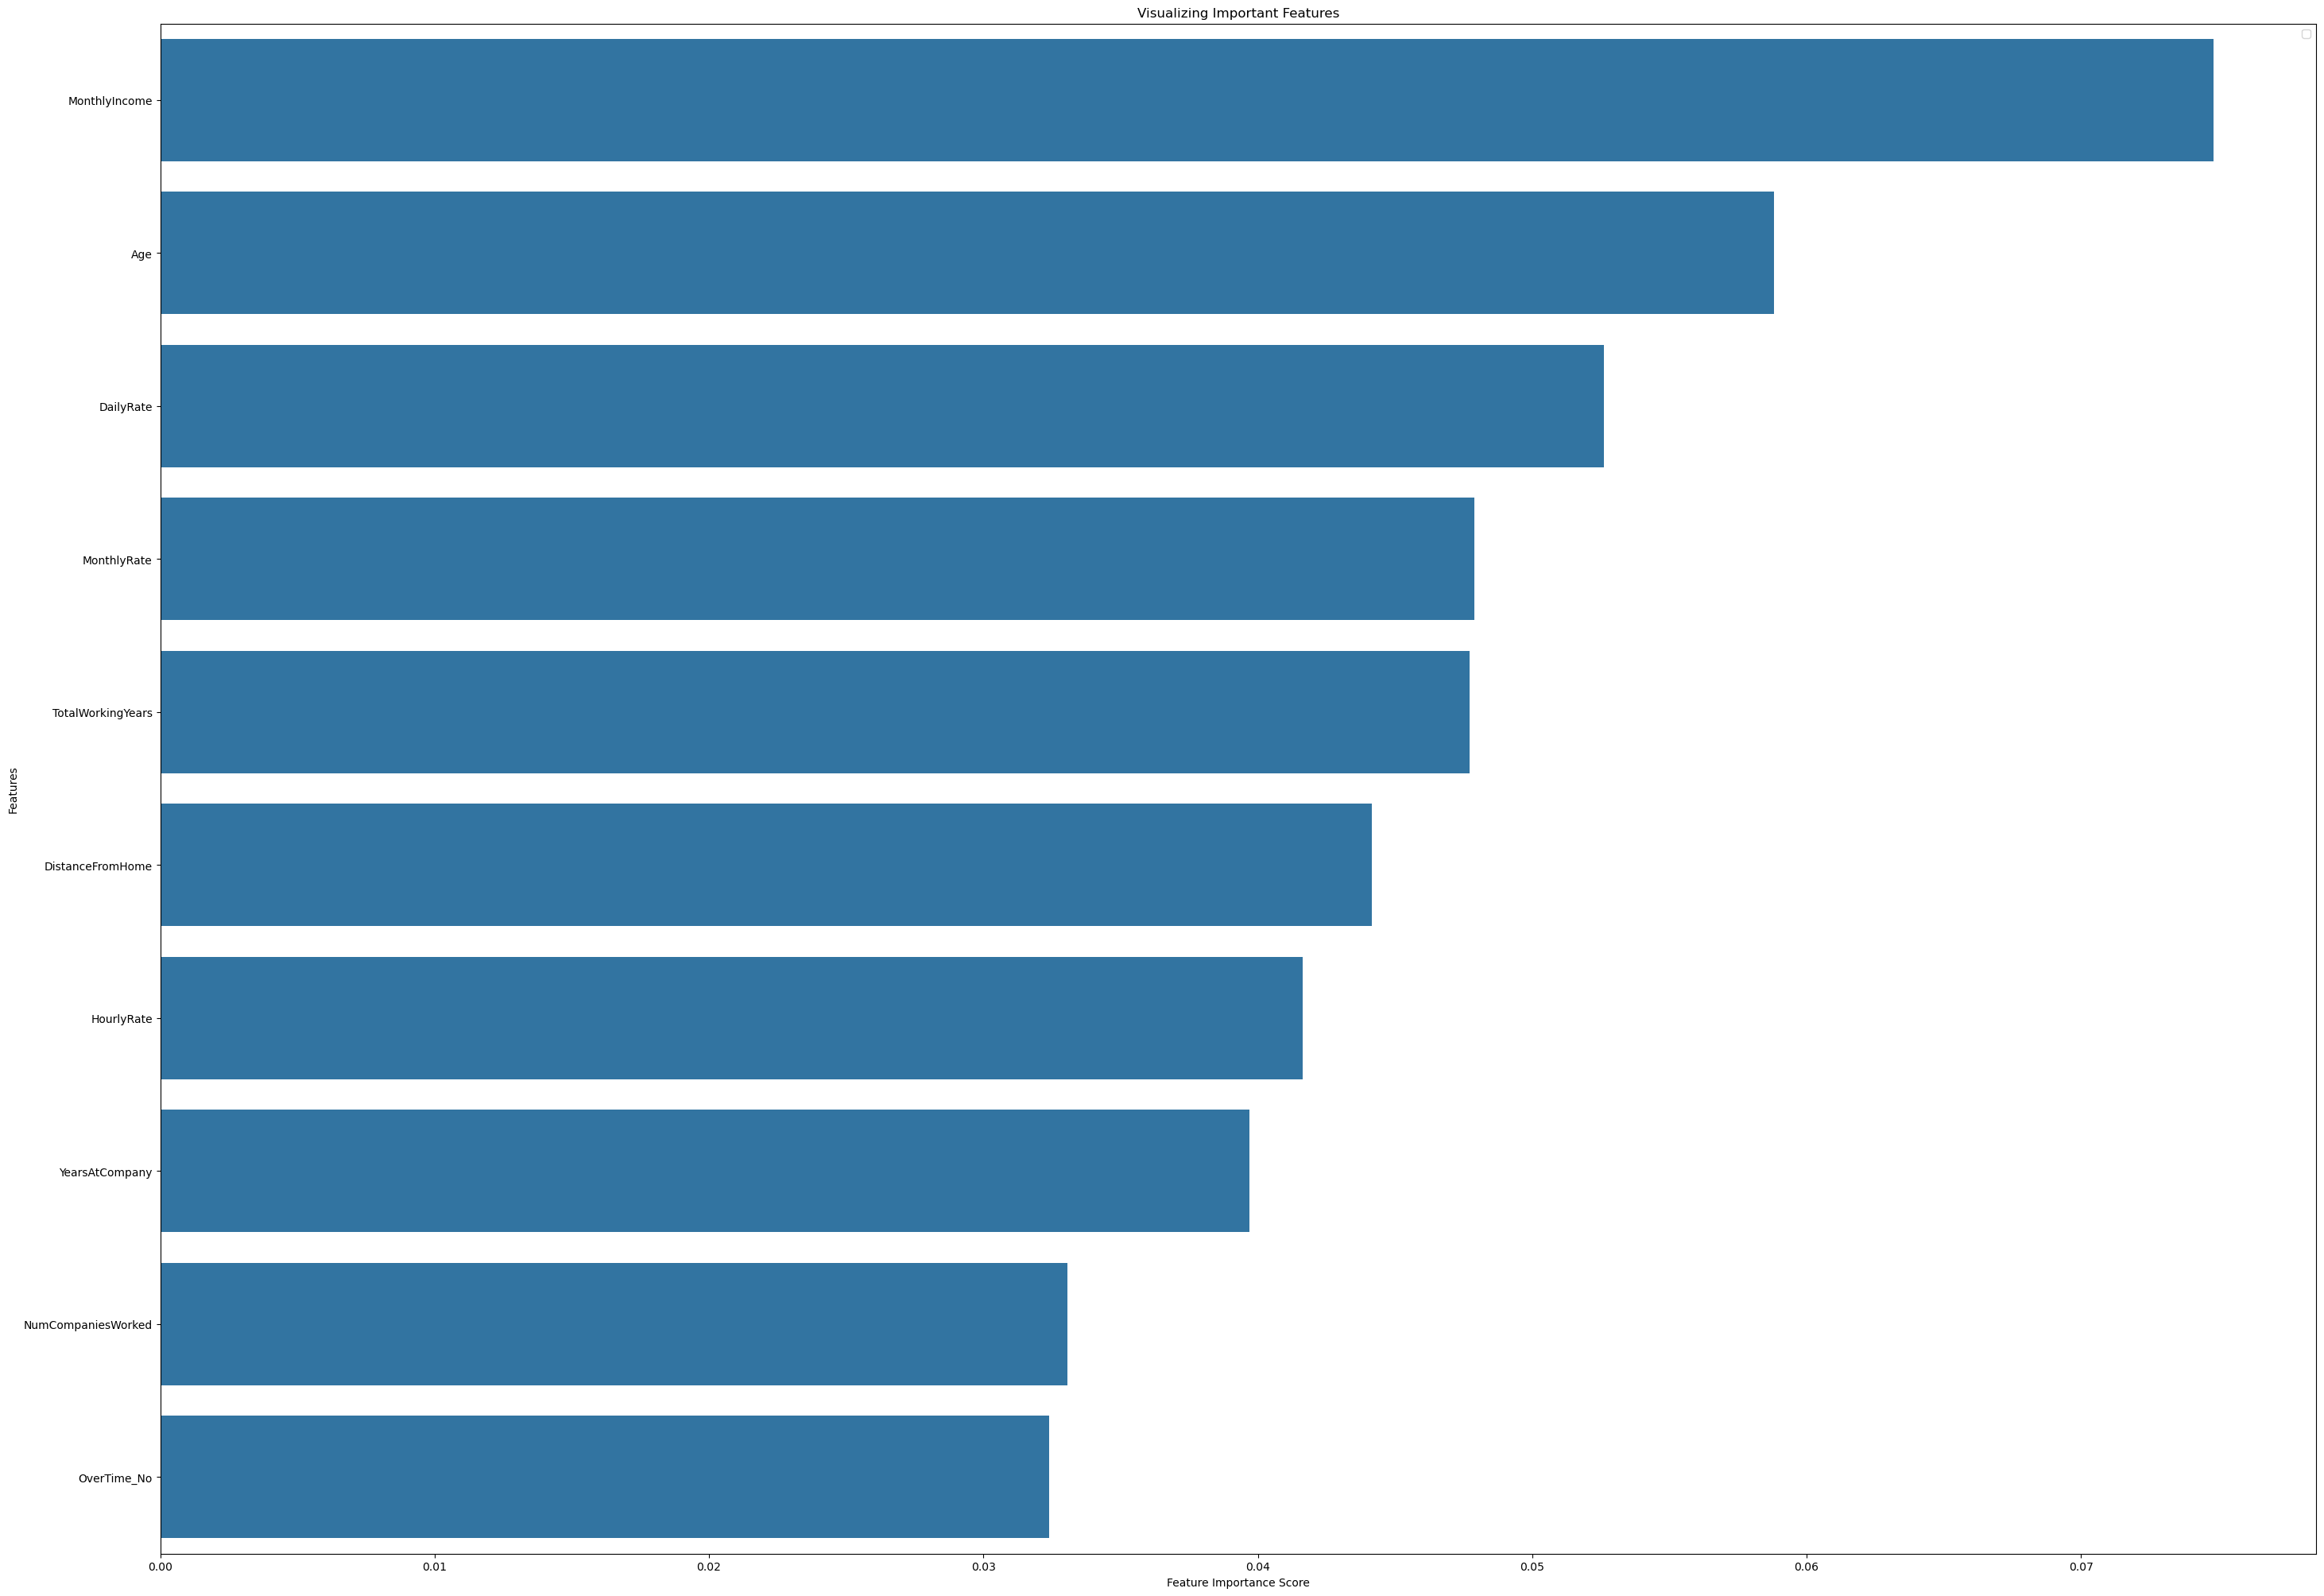

In [29]:
# Finding the variable with more importance
feature_imp = pd.Series(RF.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [30]:
# Prediction on test data
y_pred = RF.predict(X_test)

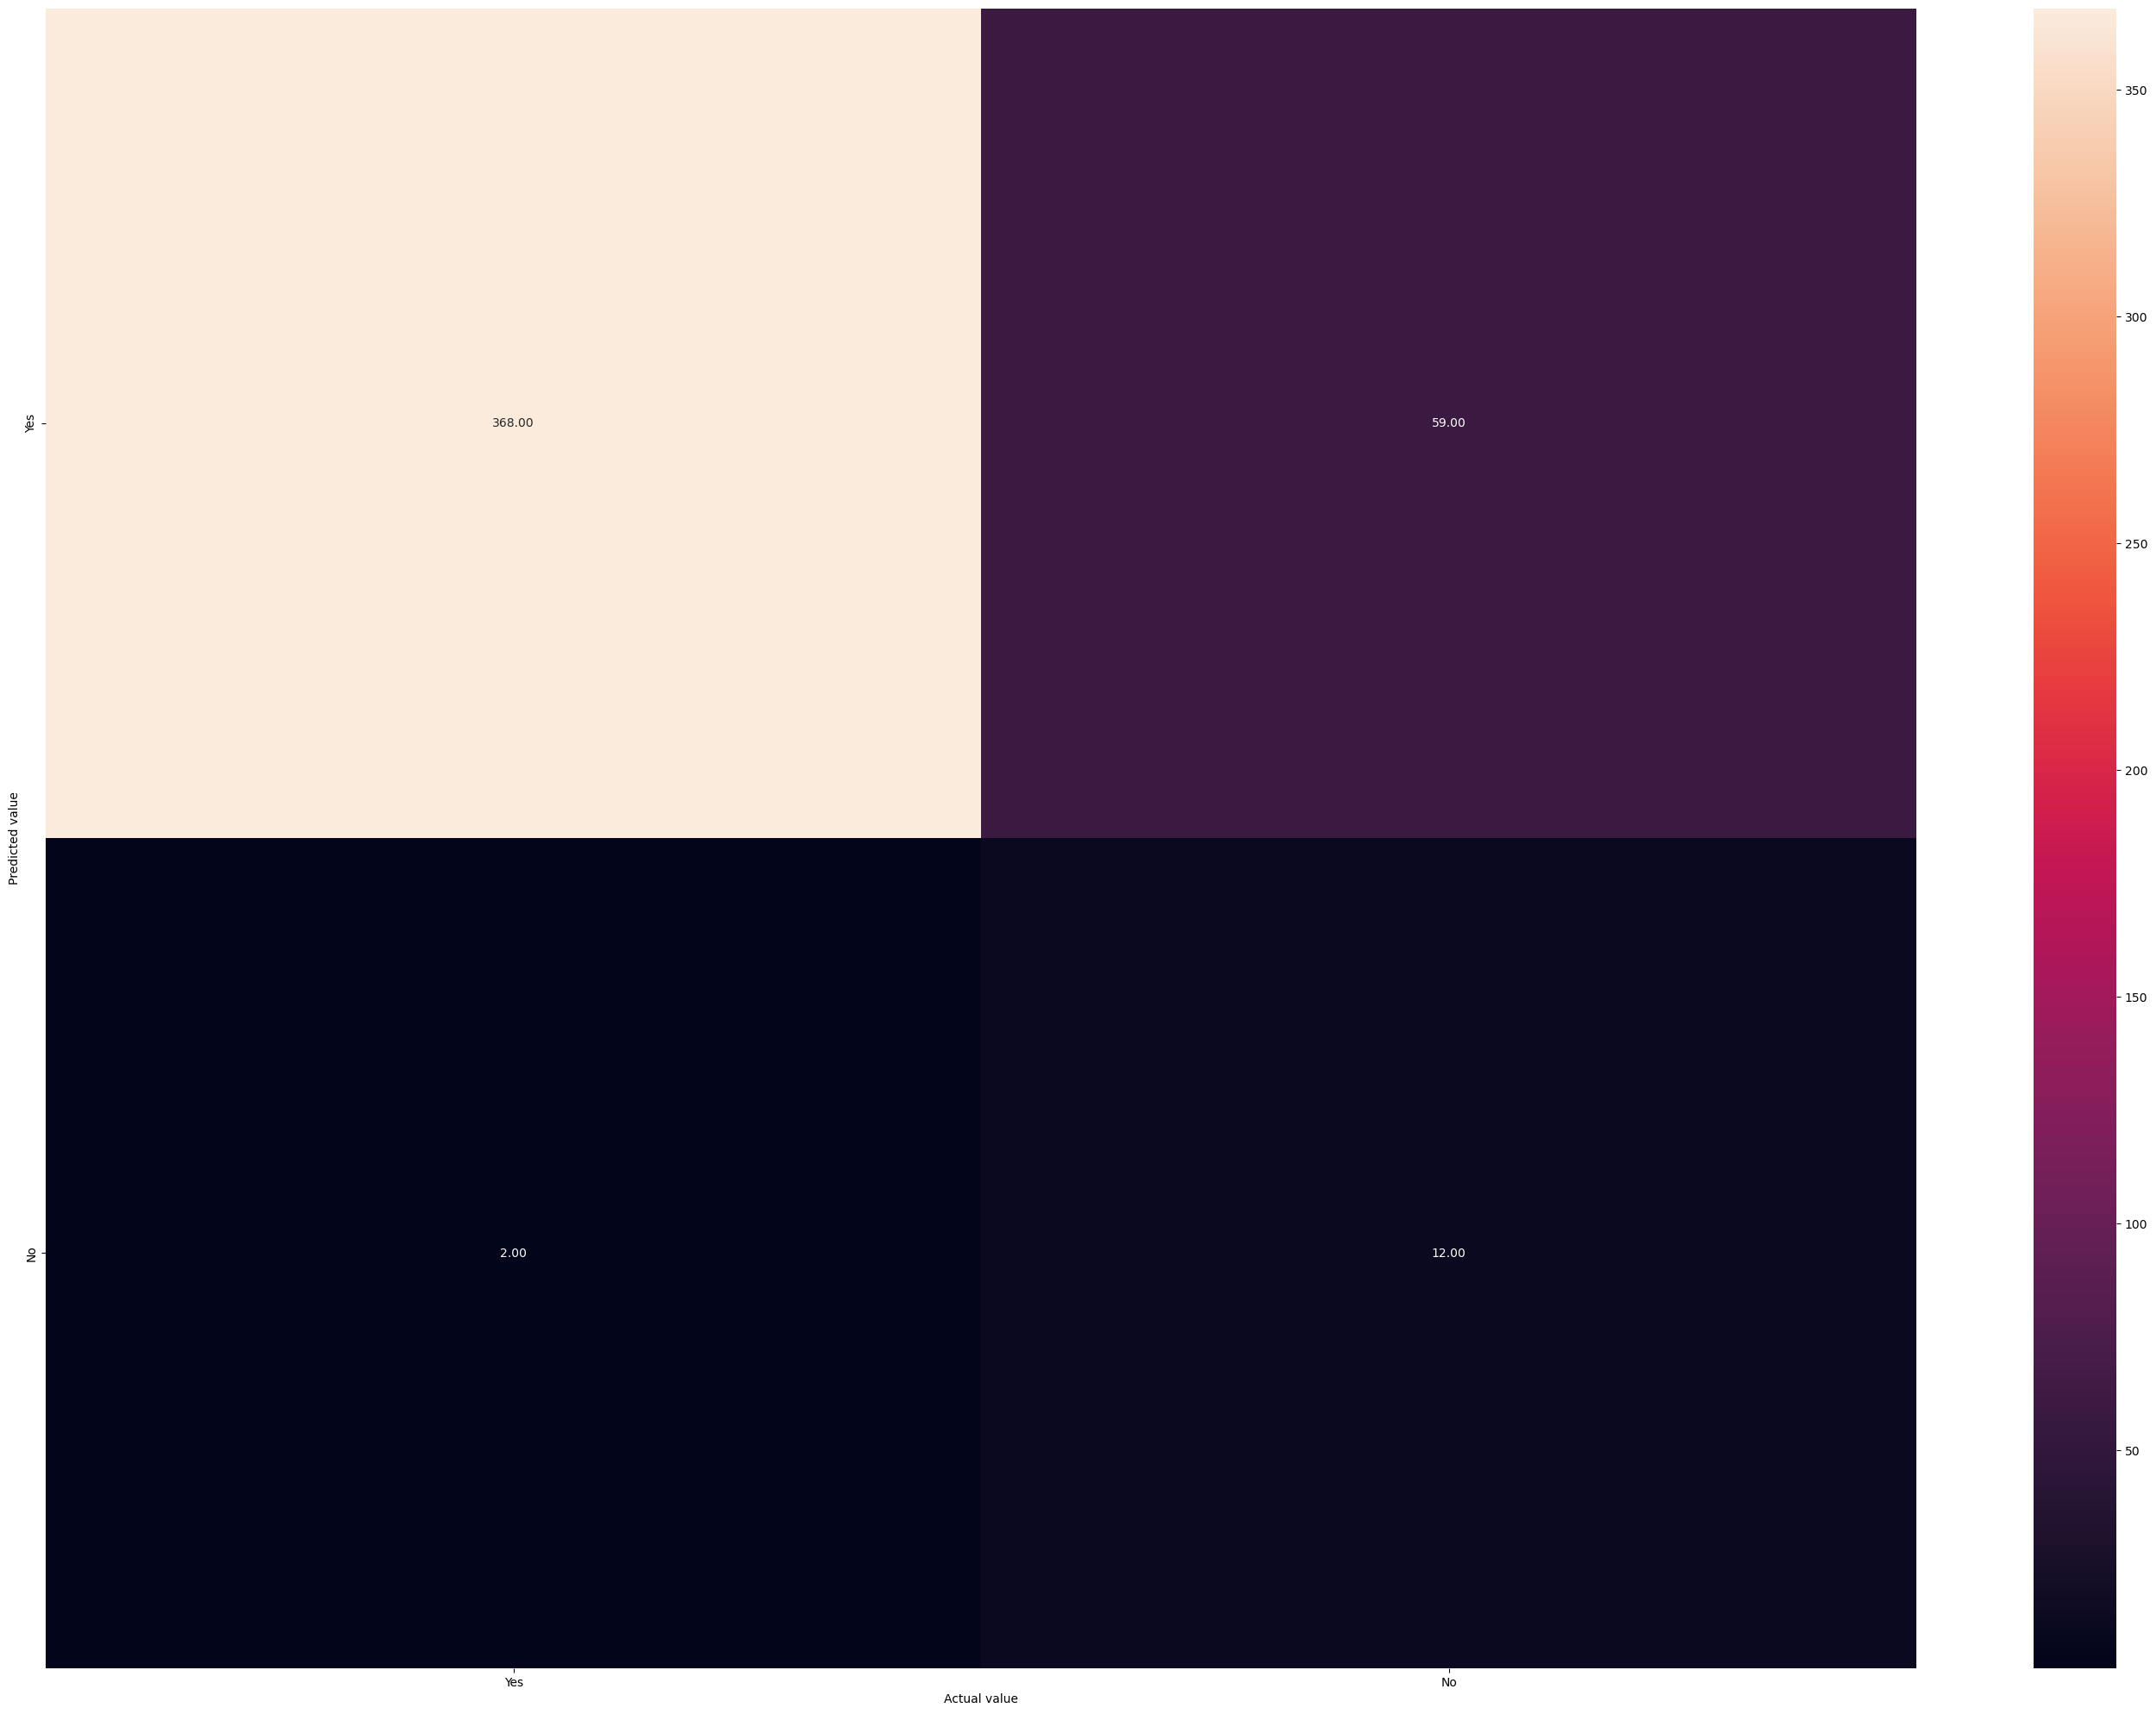

In [31]:
# Confusion matrix
from sklearn.metrics import auc,confusion_matrix
cm=confusion_matrix(y_test, y_pred).T
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
plt.ylabel('Predicted value')
plt.xlabel('Actual value')
plt.show()

In [32]:
# Calculating the accuracy, precision and the recall
from sklearn import metrics
m_accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', m_accuracy )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100 , 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  86.17
Precision :  85.71
Recall :  16.9
